- Caltech101 이미지를 학습시켜 이미지 인식을 구현.
- chair/image_0016.jpg 이미지(의자)와 유사한 이미지를 검색.

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os, re

In [2]:
# 파일 경로.
search_dir = 'img/101_ObjectCategories'
cache_dir  = 'img/cache_avhash'

# 캐시 폴더 만들기.
if not os.path.exists(cache_dir):
    os.mkdir(cache_dir)

In [3]:
# 이미지 데이터를 Hash로 변환하는 함수.
def average_hash(fname, size=16) :
    fname2 = fname[len(search_dir) :]
    # 캐시 파일이 저장될 경로 생성.
    cache_file = cache_dir + '/' + fname2[1:].replace('/', '_') +'.csv'
    # print(cache_file)
  
    # 캐시 파일이 없다면 생성. 있다면 읽어옴.
    if not os.path.exists(cache_file):
        
        # 이미지 데이터를 읽어와 2진 데이터를 생성.
        img = Image.open(fname)
        img = img.convert('L')
        img = img.resize((size, size), Image.ANTIALIAS )
        pixels = np.array(img.getdata()).reshape((size,size))
        pixels = np.array(img.getdata()).reshape((size,size))
        avg = pixels.mean()    
        px = 1*(pixels > avg)
        
        # 생성된 데이터를 파일로 저장.
        np.savetxt(cache_file, px, fmt='%.0f', delimiter=',')
    else:
        px = np.loadtxt(cache_file, delimiter=',') 
    return px

In [4]:
# 해밍 거리 구하기.
# 해밍 거리 : 같은 문자 수를 가진 2개의 문자열에서 대응하는 위치에 있는 문자 중 다른 것의 개수를 나타냄.
def hanming_dist(a, b):
    
    # 1차원 배열로 변환.
    aa = a.reshape(1, -1)
    bb = b.reshape(1, -1)
    
    # 해밍거리를 계산.
    dist = (aa != bb).sum()
    return dist

In [5]:
# 모든 폴더에 처리할 수 있도록 폴더 순회.
def enum_all_files(path):
    
    # 모든 파일들의 경로를 가져옴.
    for root, dirs, files in os.walk(path):
        for f in files :
            fname = os.path.join(root, f)
            
            # 이미지 파일인 경우에만 반환.
            if re.search(r'\.(jpg|jpeg|png)$', fname):
                yield fname

In [6]:
# 이미지 찾는 함수.
def find_image(fname, rate) :

    # 해당 파일의 평균 해시값을 가져옴.
    src = average_hash(fname)
    
    # 모든 파일을 탐색.
    for fname2 in enum_all_files(search_dir) :
        
        # 경로에 윈도우식이 있다면 리눅스 식으로 변경해줌.
        fname2 = fname2.replace('\\','/')
        # print(fname2)
        
        # 다른 파일도 캐시를 읽어옴.
        dst = average_hash(fname2)
        
        # 원본과 다른 이미지들 간의 해밍거리를 구함.
        diff_r = hanming_dist(src, dst) / 256
        
        # 구해진 해밍거리가 작다면(기준 이미지와 현재 이미지 데이터가 유사)
        if diff_r < 0.25 :
            yield(diff_r, fname2)

In [7]:
# average_hash(search_dir + '/chair/image_0016.jpg')
find_List = list( find_image(search_dir + '/chair/image_0016.jpg', 0.25) )

오차값 : 0.23828125


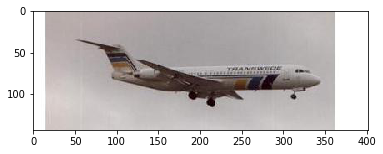

오차값 : 0.22265625


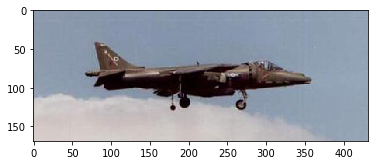

오차값 : 0.24609375


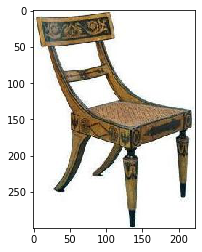

오차값 : 0.0


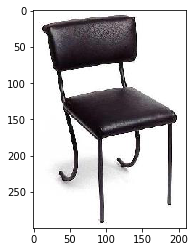

오차값 : 0.2265625


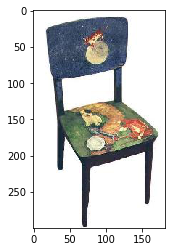

오차값 : 0.24609375


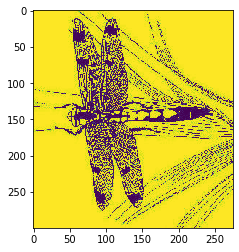

오차값 : 0.2265625


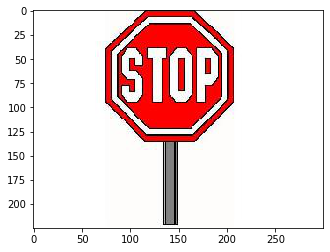

오차값 : 0.234375


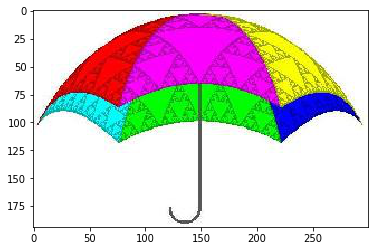

In [8]:
# 결과 : 의자와 유사한 그림을 잘 찾아내지 못하는 양상을 보임. 
# 검색된 이미지 시각화.
for rate, fname in find_List :
    print(f'오차값 : {rate}')
    
    # 원본을 그려봄.
    a1 = Image.open(fname)
    plt.imshow(a1)
    plt.show()